# **Random Forest Assignment**

**Importing Libraries**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
#!pip install scikit-learn==1.1.0

In [3]:
#Importing the dataset
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [5]:
import graphviz

In [6]:
data = pd.DataFrame(boston.data)

In [7]:
#Asssign names to columns
data.columns = boston.feature_names

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#Add field for reponse variable
data['PRICE'] = boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: ylabel='Frequency'>

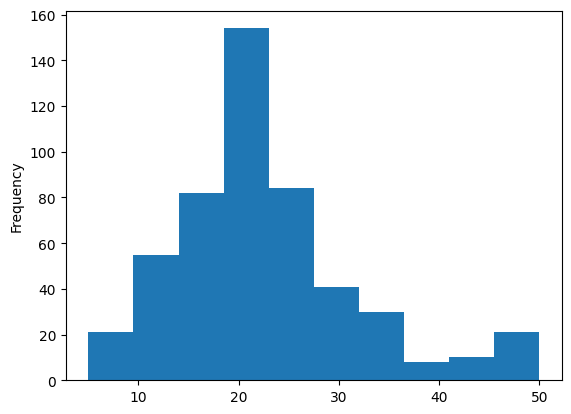

In [11]:
data['PRICE'].plot(kind = 'hist')

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf = RandomForestRegressor(n_estimators = 400, min_samples_leaf=0.12, random_state=123)

In [15]:
#Separate features from response field
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 123)

In [17]:
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=400, random_state=123)

In [19]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=0.12, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto',
                      min_samples_leaf=0.12, n_estimators=400,
                      random_state=123)

In [20]:
rf_pred = rf.predict(X_test)
rf_pred2 = rf.predict(X_train)

In [21]:
rmse_test = mean_squared_error(y_test, rf_pred)**(1/2)
rmse_train = mean_squared_error(y_train, rf_pred2)**(1/2)

In [22]:
print("Test set RMSE: %f " % (rmse_test))
print("Train set RMSE: %f " % (rmse_train))

Test set RMSE: 5.478919 
Train set RMSE: 5.100675 


In [23]:
rf_params = {'max_depth': [3,4,5,6],'min_samples_leaf':[0.04,0.06,0.08], 'max_features':[0.2,0.4,0.6,0.8]}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=10,
                     scoring='neg_mean_squared_error',
                     verbose=1)

In [25]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(min_samples_leaf=0.12,
                                             n_estimators=400,
                                             random_state=123),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error', verbose=1)

In [28]:
GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,

                                             min_samples_leaf=0.12,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(criterion='mse',
                                             max_features='auto',
                                             min_samples_leaf=0.12,
                                             n_estimators=400,
                                             random_state=123),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='neg_mean_squared_error', verbose=1)

In [30]:
import numpy as np

In [31]:
print('Best parameters found for rf: ', grid_rf.best_params_)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}
Lowerst RMSE found for rf:  2.004769443471977


In [32]:
#Test this model on unseen data. First, list attributes
list(X.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [33]:
#Take a look at the data to help formulate an example observation
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [34]:
#Most important features for model variance
pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)

LSTAT      0.628125
RM         0.361297
DIS        0.007148
CRIM       0.002207
NOX        0.000663
PTRATIO    0.000517
TAX        0.000044
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
AGE        0.000000
RAD        0.000000
B          0.000000
dtype: float64

In [38]:
import matplotlib.pyplot as plt

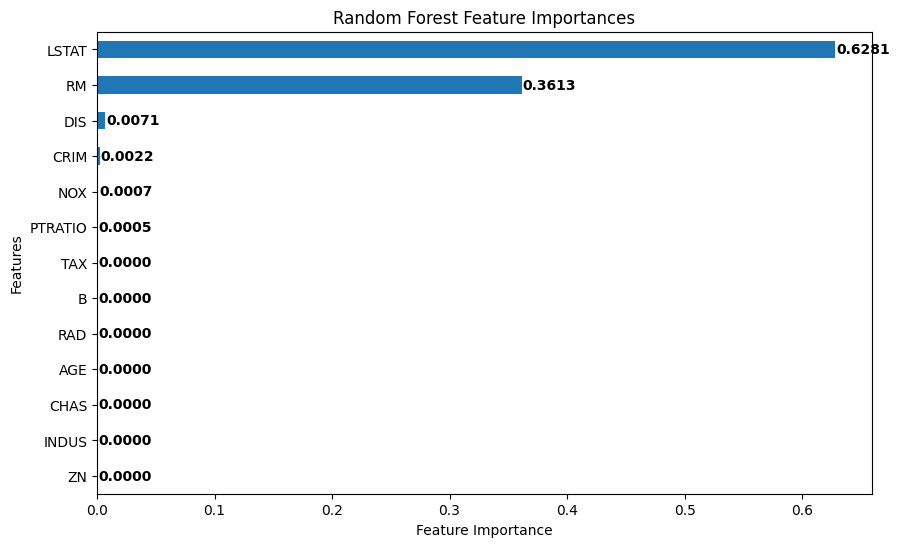

In [48]:
importance_series = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = importance_series.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')

# Adding annotations to each bar
for i, v in enumerate(importance_series):
    ax.text(v + 0.001, i, f'{v:.4f}', color='black', fontweight='bold', va='center')

plt.show()